# Correlation - relationship between two numerical variables
- one variable could cause oe depend on the values of another variable
- one variable could be lightly associated with another variable
- two variables depend on a third unknown variable

# Tpes of correlation
- Negative correlation : in opposite direction 
- positive correlation : in same direction
- neutral correlation : no relationship

# Covariance
- variables can be related by a linear relatioship. This is a realtionship that is consistently additive across the two data samples.
- this realtionship can be summarized between two variables called the covariance.
- the sign of the covariance can be interpreted as whether the two variables change in the same direction or opposite directions.
- The magnitude of the covariance is not easily interpreted.A covariance value of the xero indicates that both variables are completely independent.

In [1]:
# import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import datasets
boat = sns.load_dataset("titanic")
flower = sns.load_dataset("iris")

In [3]:
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# covariance method one
np.cov(boat['age'], boat['fare'])


array([[          nan,           nan],
       [          nan, 2469.43684574]])

In [7]:
# other method
cov_mat = np.stack((boat['age'],boat['fare']), axis=0)
print(np.cov(cov_mat))

[[          nan           nan]
 [          nan 2469.43684574]]


# Correlation instead of Covariance


In [8]:
boat.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# correlation for data 
- for normal data : pearson correlation
- for non-guassian distribution : spearman correlation

In [ ]:
# Simple correaltion 
boat.corr()

In [ ]:
corr = boat.corr(method='spearman')

In [ ]:
sns.regplot(flower['sepal_length'], flower ['sepal_height'], data = flower)

# Heat Map for correlation 

In [ ]:
corr = boat.corr(method='pearson')
sns.heatmap(corr, annot=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarms')

In [ ]:
sns.pairplot(corr)

In [21]:
# import new dataset 
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


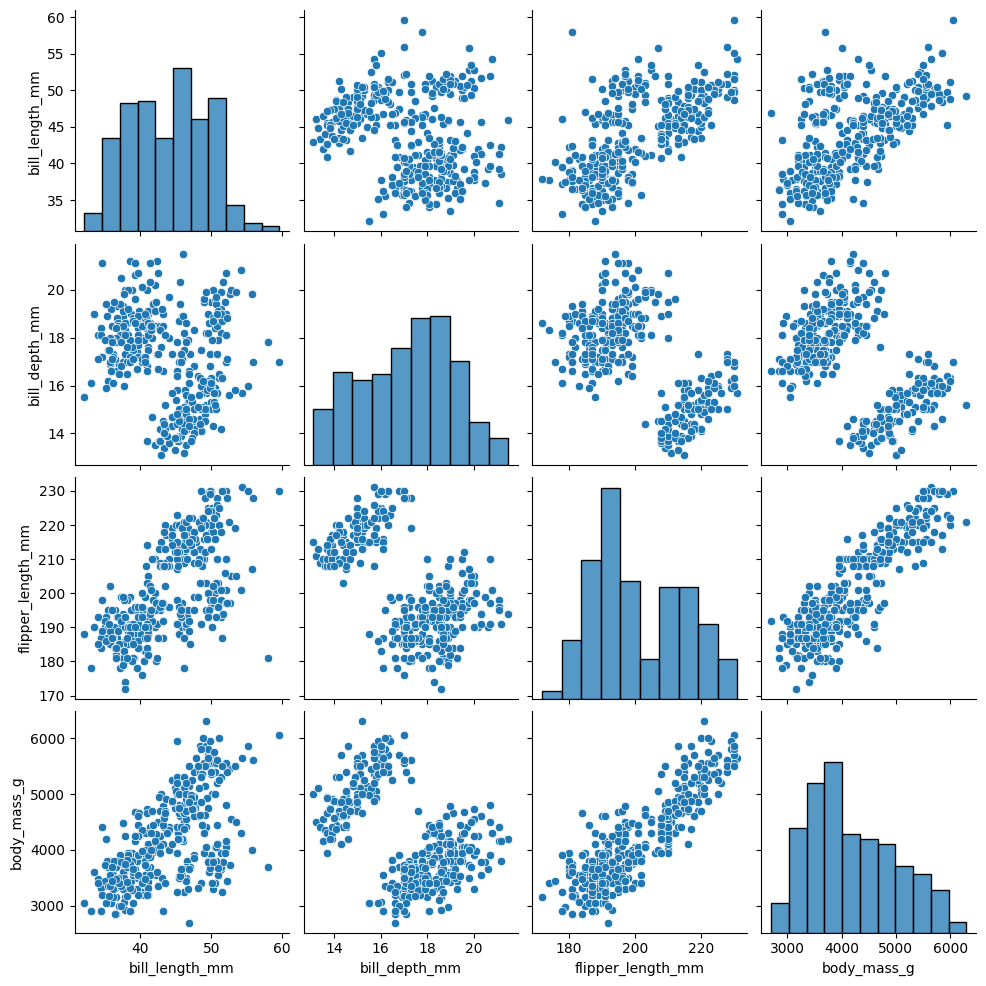

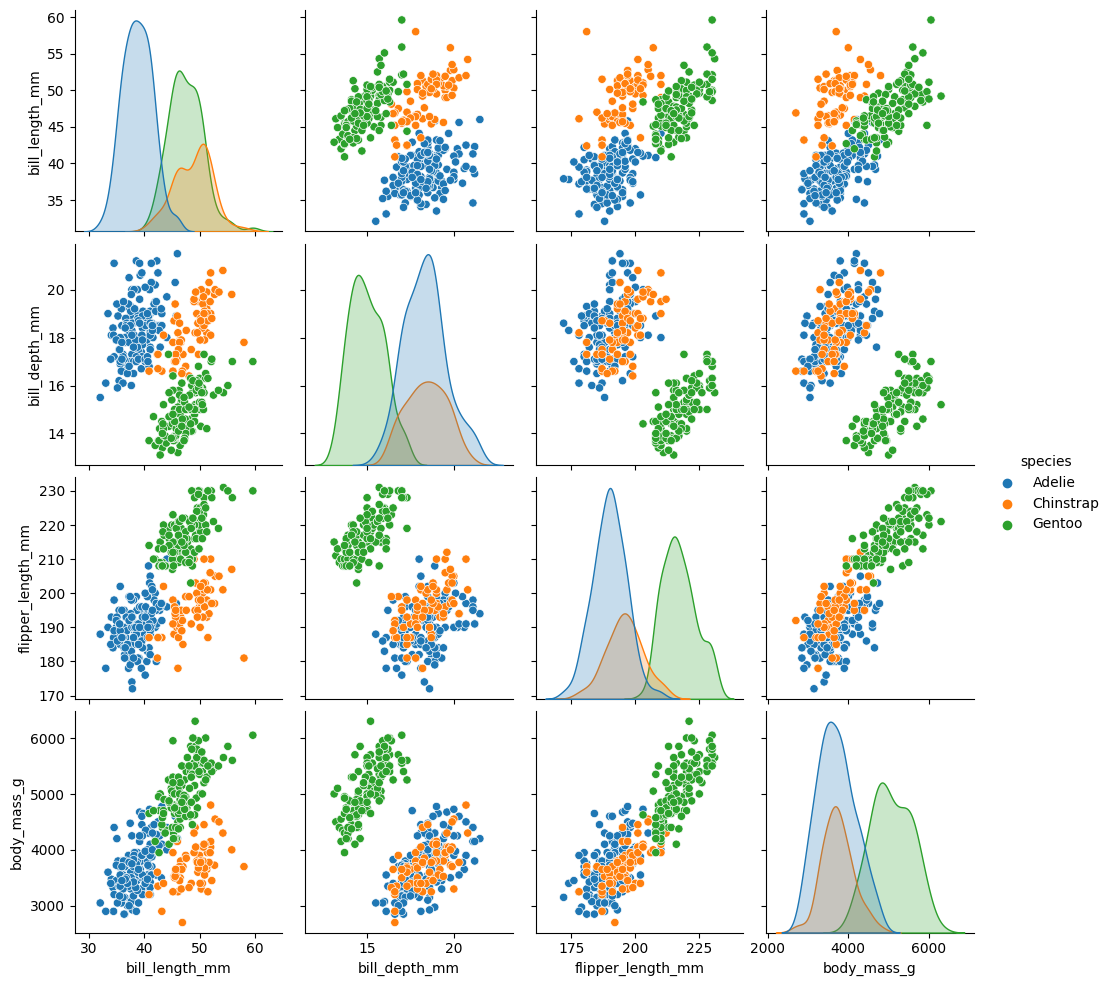

In [20]:
# pairplots
sns.pairplot(penguins)
sns.pairplot(penguins, hue="species")

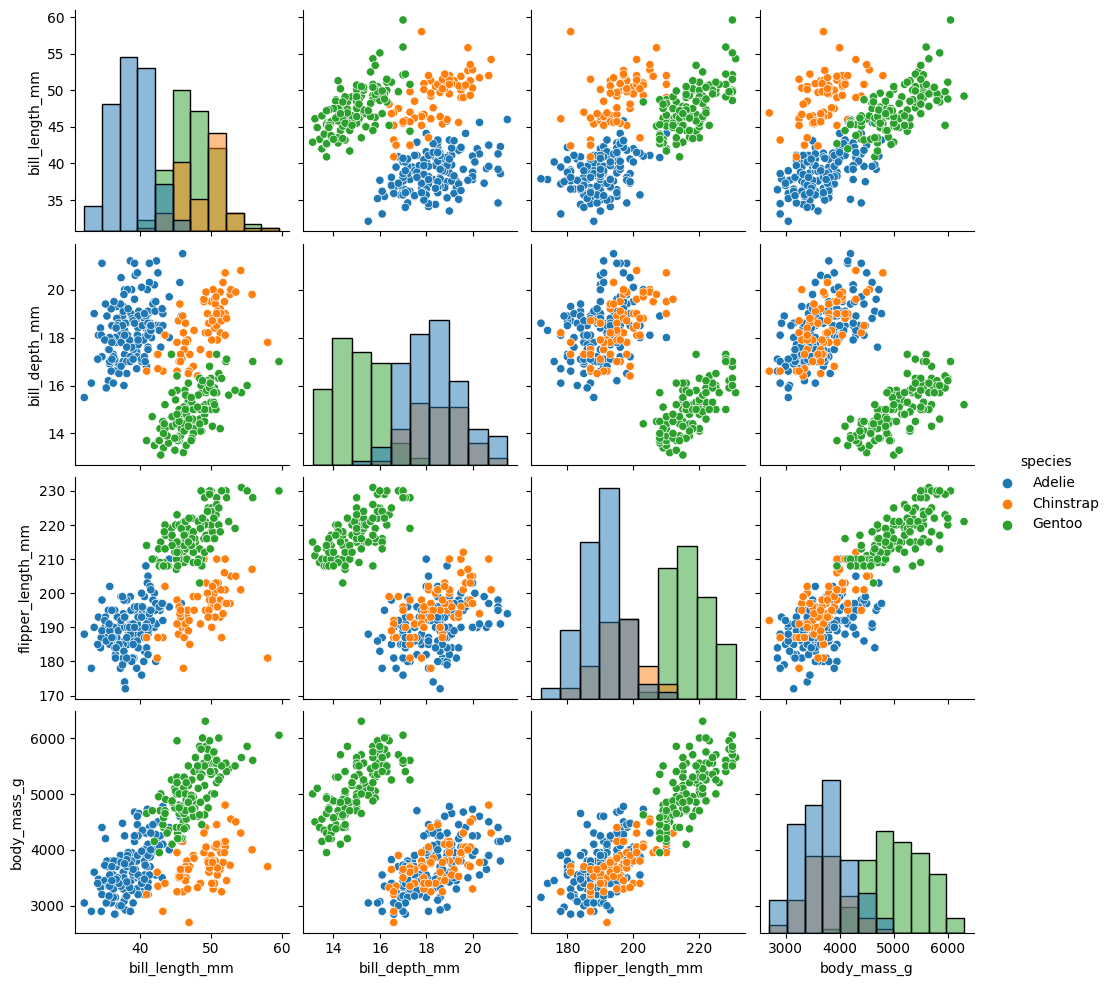

In [22]:
# we can convert it into histogram
sns.pairplot(penguins, hue="species", diag_kind="hist")

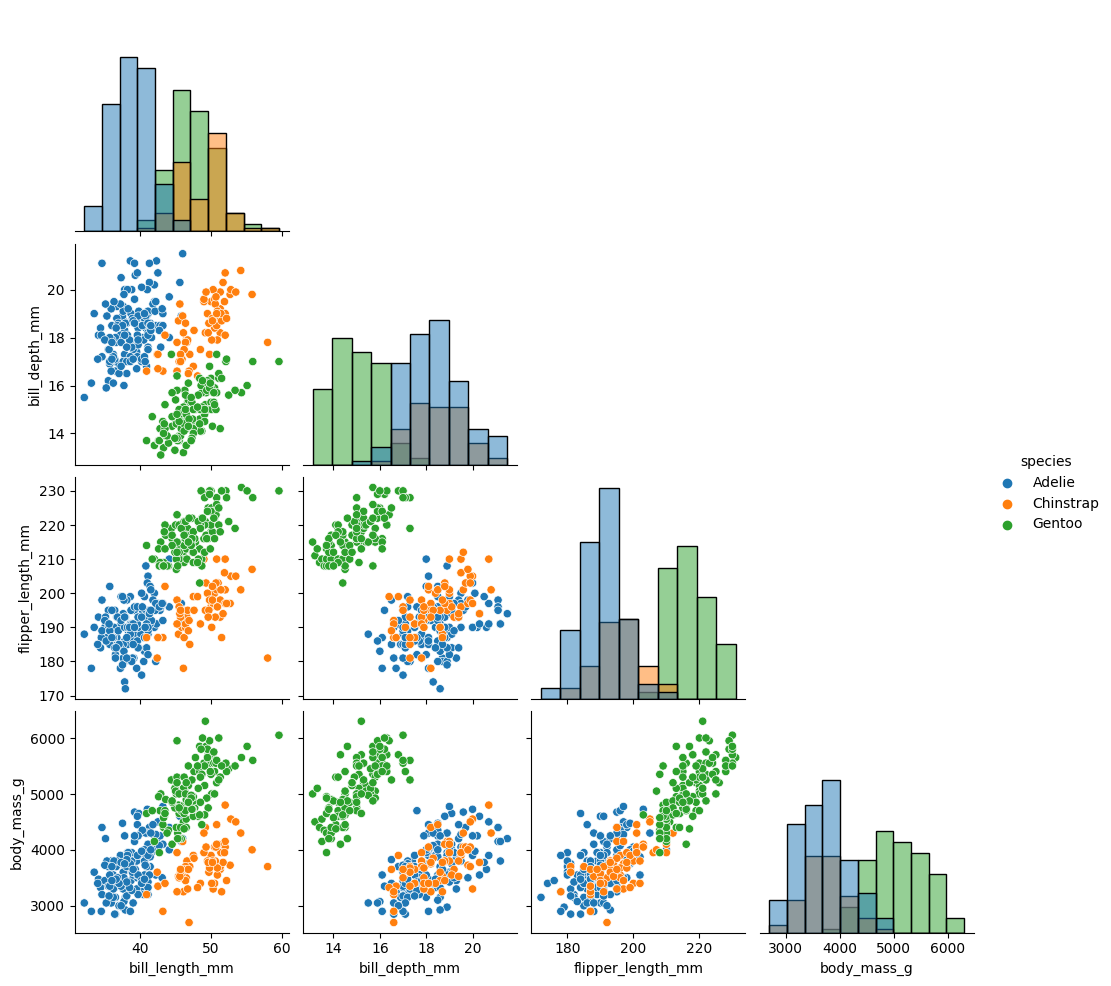

In [23]:
sns.pairplot(penguins, hue="species", diag_kind="hist", corner=True )

# Scipy library for correlation

In [24]:
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# calculate pearson's correlation
from scipy.stats import pearsonr
corr,_ = pearsonr(flower['sepal_length'], flower['petal_length'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.872
